# ANSI\_PADDING

steuert das Verhalten von Werten, die kleiner sind als die Spalten (Default = 0)

- ANSI\_PADDING ON (1) = char und varchar verhalten sich unterschiedlich  
    
- ANSI\_PADDING OFF (0) = char und varchar verhalten sich identisch

In [4]:
USE master
GO
Drop Database if exists [ANSI_PADDING_TEST]
CREATE DATABASE [ANSI_PADDING_TEST]
GO

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.325

**<u>Beispiel 1:</u>** ANSI\_PADDING ON =\> bis zur länge des char(X) wird mit Leerzeichen aufgefüllt

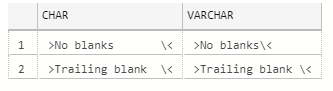

In [ ]:
USE [ANSI_PADDING_TEST]
GO

DROP Table if EXISTS [t1]
GO

PRINT 'Testing with ANSI_PADDING ON'  
SET ANSI_PADDING ON;  
GO  
  
CREATE TABLE t1 (  
   charcol CHAR(16) NULL,   
   varcharcol VARCHAR(16) NULL,   
   varbinarycol VARBINARY(8)  
);  
GO  
INSERT INTO t1 VALUES ('No blanks', 'No blanks', 0x00ee);  
INSERT INTO t1 VALUES ('Trailing blank ', 'Trailing blank ', 0x00ee00);  
  
SELECT 'CHAR' = '>' + charcol + '\<', 'VARCHAR'='>' + varcharcol + '\<'
FROM t1;  
GO  

**<u>Beispiel 2:</u>** ANSI\_PADDING OFF =\> bis zur länge des char(X) wird mit Leerzeichen aufgefüllt

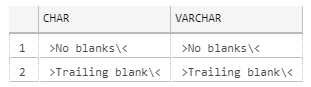

In [ ]:
USE [ANSI_PADDING_TEST]
GO

DROP Table if EXISTS [t2]
GO

PRINT 'Testing with ANSI_PADDING OFF';  
SET ANSI_PADDING OFF;  
GO  
  
CREATE TABLE t2 (  
   charcol CHAR(16) NULL,   
   varcharcol VARCHAR(16) NULL,   
   varbinarycol VARBINARY(8)  
);  
GO  
INSERT INTO t2 VALUES ('No blanks', 'No blanks', 0x00ee);  
INSERT INTO t2 VALUES ('Trailing blank ', 'Trailing blank ', 0x00ee00);  
  
SELECT 'CHAR' = '>' + charcol + '\<', 'VARCHAR'='>' + varcharcol + '\<'
FROM t2;  
GO  

## ANSI PADDING (Columnweise)

Auch wenn die oberen Beispiele suggerieren, dass ANSI Padding auf einer Tabelle gesetzt werden, so ist es auch möglich die ANSI Padding Einstellungen für einzelne Spalten zu steuern.

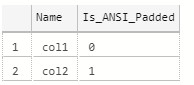  

_MSDN: "<span style="background-color: rgb(255, 255, 255); color: rgb(82, 89, 96); font-family: -apple-system, BlinkMacSystemFont, &quot;Segoe UI&quot;, &quot;Liberation Sans&quot;, sans-serif; font-size: 15px;">This setting affects only the definition of new columns. After the column is created, SQL Server stores the values based on the setting when the column was created. Existing columns are not affected by a later change to this setting."</span>_

In [13]:
SET ANSI_PADDING OFF;  
GO
Create Table t3 ( col1 char(10))
GO

SET ANSI_PADDING ON;  
GO
ALTER Table t3 ADD col2 char(10)
GO

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Commands completed successfully.

Total execution time: 00:00:00.027

**<u>Analyse</u>** der ANSI PADDING Settings einer/mehrerer Tabellen

In [14]:
SELECT  Name,Is_ANSI_Padded
FROM    sys.columns
where object_Name(object_ID) = 't3'

(2 rows affected)

Total execution time: 00:00:00.052

Name,Is_ANSI_Padded
col1,0
col2,1


In [7]:
SELECT o.name AS TableName, c.name AS ColumnName, c.is_ansi_padded
FROM sys.columns c
JOIN sys.objects o
    ON c.object_id = o.object_id
where o.name in ('t1','t2')

(6 rows affected)

Total execution time: 00:00:00.031

TableName,ColumnName,is_ansi_padded
t1,charcol,1
t1,varcharcol,1
t1,varbinarycol,1
t2,charcol,0
t2,varcharcol,0
t2,varbinarycol,0
